In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d jawadali1045/20k-multi-class-crop-disease-images

Dataset URL: https://www.kaggle.com/datasets/jawadali1045/20k-multi-class-crop-disease-images
License(s): CC0-1.0
100% 2.33G/2.34G [00:30<00:00, 68.9MB/s]
100% 2.34G/2.34G [00:31<00:00, 81.0MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/20k-multi-class-crop-disease-images.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [ ]:
#Generators: It will divide the given data into batches
training_ds=keras.utils.image_dataset_from_directory(
    directory='/content/Train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)
valid_ds=keras.utils.image_dataset_from_directory(
    directory='/content/Validation',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)

Found 15450 files belonging to 42 classes.
Found 3172 files belonging to 42 classes.


In [ ]:
name1=training_ds.class_names
print(len(name1))
print(name1)

42
['American Bollworm on Cotton', 'Anthracnose on Cotton', 'Army worm', 'Becterial Blight in Rice', 'Brownspot', 'Common_Rust', 'Cotton Aphid', 'Flag Smut', 'Gray_Leaf_Spot', 'Healthy Maize', 'Healthy Wheat', 'Healthy cotton', 'Leaf Curl', 'Leaf smut', 'Mosaic sugarcane', 'RedRot sugarcane', 'RedRust sugarcane', 'Rice Blast', 'Sugarcane Healthy', 'Tungro', 'Wheat Brown leaf Rust', 'Wheat Stem fly', 'Wheat aphid', 'Wheat black rust', 'Wheat leaf blight', 'Wheat mite', 'Wheat powdery mildew', 'Wheat scab', 'Wheat___Yellow_Rust', 'Wilt', 'Yellow Rust Sugarcane', 'bacterial_blight in Cotton', 'bollrot on Cotton', 'bollworm on Cotton', 'cotton mealy bug', 'cotton whitefly', 'maize ear rot', 'maize fall armyworm', 'maize stem borer', 'pink bollworm in cotton', 'red cotton bug', 'thirps on  cotton']


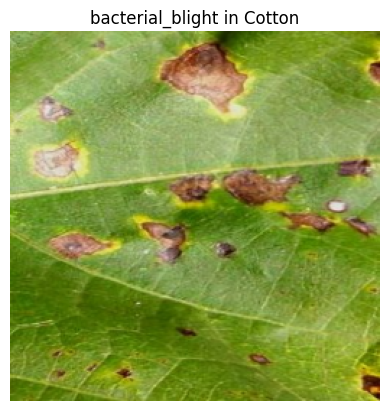

In [ ]:
for image,label in training_ds.take(1):
  plt.imshow(image[0].numpy().astype("uint8"))
  plt.title(name1[label[0]])
  plt.axis("off")
  plt.show()

In [ ]:
valid=valid_ds.class_names
print(valid)

['American Bollworm on Cotton', 'Anthracnose on Cotton', 'Army worm', 'Bacterial Blight in cotton', 'Becterial Blight in Rice', 'Brownspot', 'Common_Rust', 'Cotton Aphid', 'Flag Smut', 'Gray_Leaf_Spot', 'Healthy Maize', 'Healthy Wheat', 'Healthy cotton', 'Leaf Curl', 'Leaf smut', 'Mosaic sugarcane', 'RedRot sugarcane', 'RedRust sugarcane', 'Rice Blast', 'Sugarcane Healthy', 'Tungro', 'Wheat Brown leaf rust', 'Wheat Stem fly', 'Wheat aphid', 'Wheat black rust', 'Wheat leaf blight', 'Wheat mite', 'Wheat powdery mildew', 'Wheat scab', 'Wheat___Yellow_Rust', 'Wilt', 'Yellow Rust Sugarcane', 'bollrot on Cotton', 'bollworm on Cotton', 'cotton mealy bug', 'cotton whitefly', 'maize ear rot', 'maize fall armyworm', 'maize stem borer', 'pink bollworm in cotton', 'red cotton bug', 'thirps on  cotton']


In [ ]:
train_size=len(training_ds)
print(train_size)

483


In [ ]:
test1=int(len(training_ds)*0.02)
new_train_size=train_size-test1
train_ds=training_ds.take(new_train_size)
test_from_train=training_ds.skip(new_train_size)
type(train_ds)

tensorflow.python.data.ops.take_op._TakeDataset

In [ ]:
valid_size=len(valid_ds)

In [ ]:
test2=int(len(valid_ds)*0.08)
new_valid_size=valid_size-test2
validation_ds=valid_ds.take(new_valid_size)
test_from_valid=valid_ds.skip(new_valid_size)
type(validation_ds)

tensorflow.python.data.ops.take_op._TakeDataset

In [ ]:
test_ds = test_from_train.concatenate(test_from_valid)
